In [1]:
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

Linear regression
-----------------

Data from Example 6.2 of Seborg, Edgar, Melichamp and Doyle (3rd edition)

In [2]:
x = [1, 2.3, 2.9, 4, 4.9, 5.8, 6.5, 7.7, 8.4, 9]
y = [2, 4.4, 4.5, 7.5, 9.1, 10.8, 12.3, 14.3, 15.8, 16.8]

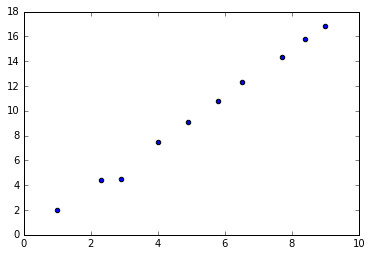

In [3]:
plt.scatter(x, y)

First, let's apply the pseudoinverse method directly (note you should never do this for production code, as calculating inverses is computationally expensive)

If $\beta=\begin{bmatrix}a\\b\end{bmatrix} $, $Y = \beta=\begin{bmatrix}y_1\\y_2\\\vdots \end{bmatrix} $, $X = \begin{bmatrix}x_1 & 1 \\x_2 & 1\\\vdots & \vdots \end{bmatrix} $

In [4]:
Y = numpy.asmatrix(numpy.atleast_2d(y).T)
X = numpy.asmatrix(numpy.hstack([numpy.atleast_2d(x).T, numpy.ones_like(Y)]))

then the solution minimising the sum of the squares of the residual ( $Y - X\beta$ ) is 

$$ \hat{\beta} = (X^TX)^{-1}X^T Y $$

In [5]:
#Excel: =MMULT((MINVERSE(MMULT(TRANSPOSE(_X); _X))); MMULT(TRANSPOSE(_X); _Y))
betahat = (X.T*X).I*X.T*Y
betahat

matrix([[ 1.89145461],
        [-0.18013673]])

*Note:* The code above is as close as possible to the equation above, as I have made `X` and `Y` matrices. Normal `numpy.array`s don't have an `.I` property and don't multiply matrix-fasion but rather element-wise. Here is how we would have to write the code if we used arrays:

In [6]:
Y = numpy.asarray(Y)
X = numpy.asarray(X)

In [7]:
numpy.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

array([[ 1.89145461],
       [-0.18013673]])

This is a very common operation, so there are nicer routines to do this fit. There are a whole range of functions in numpy which start with poly. Press tab to see them.

In [8]:
numpy.poly

<function numpy.lib.polynomial.poly>

In [9]:
poly = numpy.polyfit(x, y, 1)
poly

array([ 1.89145461, -0.18013673])

It is useful to plot the regression with the data points, but we should sample on a finer grid.

In [10]:
xx = numpy.linspace(min(x), max(x))


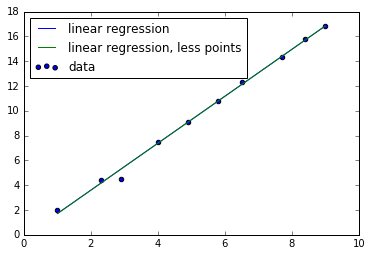

In [11]:
def regplot(poly):
    yy = numpy.polyval(poly, xx)
    plt.scatter(x, y, label='data')
    plt.plot(xx, yy, label='linear regression')
    plt.plot(x, numpy.polyval(poly, x), label='linear regression, less points')
    plt.legend(loc='best')
regplot(poly)

There's obviously no difference between the two for a linear fit, but what about a more squigly one?

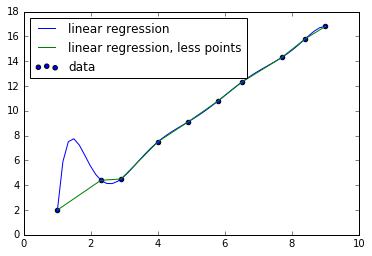

In [12]:
poly9 = numpy.polyfit(x, y, 9)
regplot(poly9)

If we had just plotted the connecting lines, we would have missed the bit sticking up on the left!

Nonlinear regression
-------------------

We can apply the same principles to fit nonlinear functions as well. The `scipy.optimize.curve_fit` function can be used to fit an aribitrary function to data

In [13]:
import scipy.optimize

Let's start by reproducing the results from the linear fit

In [14]:
def f(x, a, b):
    """fitting function"""
    return a*x + b

In [15]:
beta, _ = scipy.optimize.curve_fit(f, x, y, [1, 0])
beta

array([ 1.89145461, -0.18013672])

In [16]:
def f2(x, a, b, c):
    """ A nonlinear fitting function"""
    return numpy.sin(a*x) + b*x + c

In [17]:
beta, _ = scipy.optimize.curve_fit(f2, x, y, [1, 1, 1])

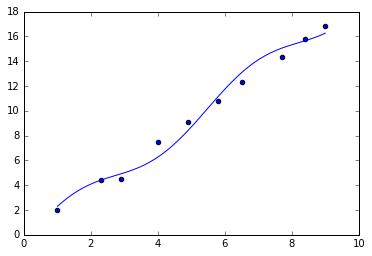

In [18]:
plt.scatter(x, y)
plt.plot(xx, f2(xx, *beta))